In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


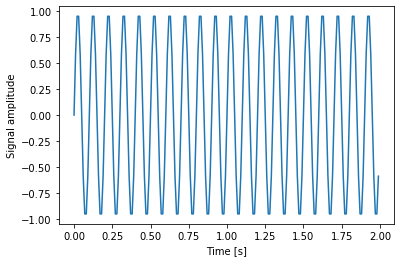

In [25]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


(-5, 110)

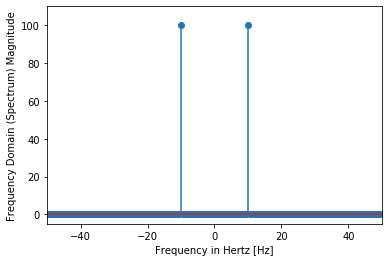

In [26]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

In [ ]:
from IPython.display import Audio
Audio('Mario.wav')

In [4]:
from scipy.io import wavfile

# rate, audio = wavfile.read('BigShip.wav')

rate, audio = wavfile.read('Mario.wav')

audio = np.mean(audio, axis=1)

Audio length: 82.23 seconds


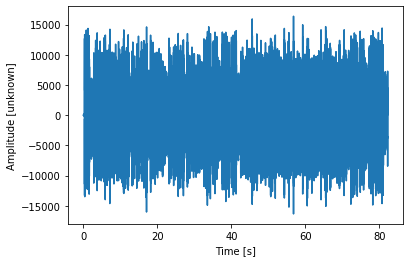

In [5]:
N = audio.shape[0]
L = N / rate

print(f'Audio length: {L:.2f} seconds')

f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]');

In [9]:
from scipy import signal

M = 1024

%time freqs, times, spectro = signal.spectrogram(audio, fs=rate, window='hanning',nperseg=1024, noverlap=M - 100,detrend=False, scaling='spectrum')

CPU times: user 1.36 s, sys: 1.24 s, total: 2.6 s
Wall time: 3.86 s


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


CPU times: user 3.43 s, sys: 1.72 s, total: 5.15 s
Wall time: 6.24 s


Text(0.5, 0, 'Time [s]')

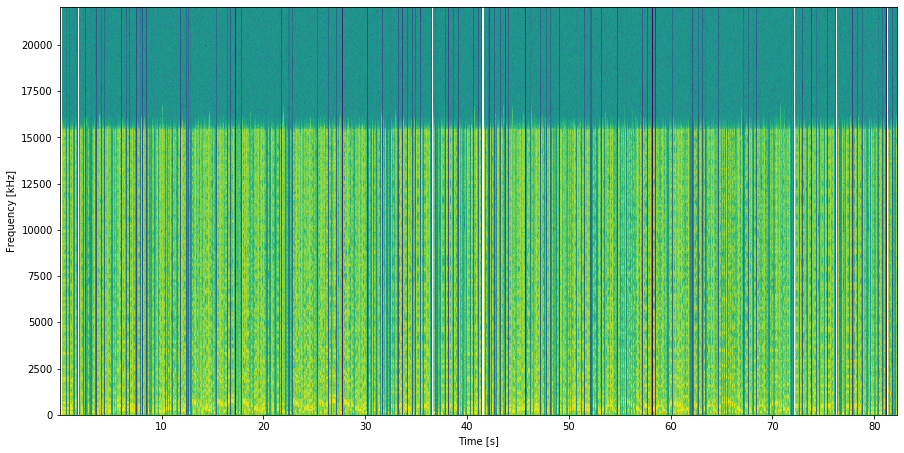

In [10]:
f, ax = plt.subplots(figsize=(15, 7.5))
%time im = ax.pcolormesh(times, freqs, 10 * np.log10(spectro))

ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]')

In [7]:
spectro = np.log10(spectro)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


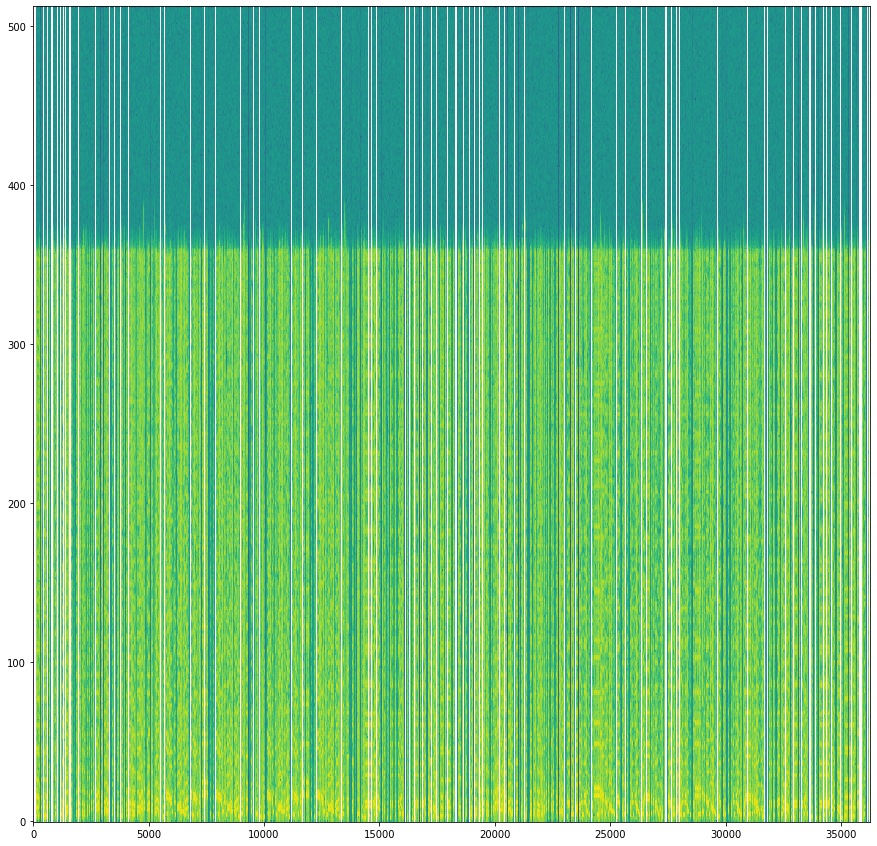

In [8]:
f, ax = plt.subplots(figsize=(15, 15))
plt.imshow( spectro ,aspect='auto')
ax.invert_yaxis()
plt.show()
